In [1]:
from __future__ import print_function
import os,re,time,sys,os,math,random,time,pickle
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.contrib import rnn
import numpy as np
import pandas as pd
from keras import backend as K
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Flatten,Dense,Embedding
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split as split

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
f = open(r'M:\Course stuff\ASPRI\data\PCH\paths\11012018.txt','r')
lines = f.readlines()
lines = [i.strip() for i in lines]

In [3]:
final_embeddings = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\loal_FE','rb'))
dictionary = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\dictionary','rb'))
reverse_dictionary = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\reverse_dictionary','rb'))
count = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\count','rb'))
print(type(final_embeddings),type(dictionary),type(reverse_dictionary),type(count))

<class 'numpy.ndarray'> <class 'dict'> <class 'dict'> <class 'list'>


In [4]:
nd_array = []
for i in range(30):
    nd_array.append(np.zeros(shape = (32,1)))

In [5]:
len(nd_array)

30

In [6]:
new_array = []
for i in range(len(lines)):
    new_array.append(nd_array)
new_array = np.asarray(new_array)

In [7]:
for i in range(len(lines)):
    splits = lines[i].split(' ')
    for j in range(len(splits)):
        #print(new_array[i][j])
        new_array[i,j] = final_embeddings[dictionary[str(splits[j])]-1].reshape(32,1)

In [8]:
new_array[0][0].shape

(32, 1)

In [10]:
if os.name != 'posix':
    paths = pd.read_csv(r'M:\Course stuff\ASPRI\supervised\11012018.csv',sep='\t',low_memory = False,index_col = False)
else:
    paths = pd.read_csv('11012018.csv',sep='\t',low_memory = False,index_col = False)
    del paths['Unnamed: 0']
paths.head()

,Paths,Fake
0,6939 4826 38803 56203,0.0
1,6939 4826 38803 56203,0.0
2,6939 4826 38803 56203,0.0
3,6939 4826 38803 56203,0.0
4,6939 4826 38803 56203,0.0


In [11]:
train,test = split(paths,test_size = 0.3)

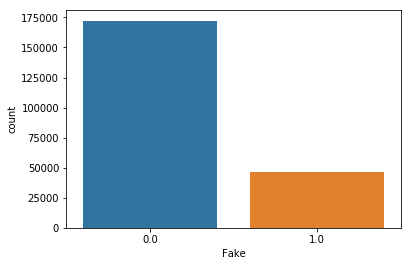

In [12]:
sns.countplot(x = 'Fake',data = train)

In [13]:
train.Fake.value_counts()

0.0    172272
1.0     46684
Name: Fake, dtype: int64

In [14]:
test.Fake.value_counts()

0.0    74058
1.0    19781
Name: Fake, dtype: int64

In [15]:
max_length = 30
vocab_size = 24612 #unique tokens for this file
#encoded_train = [one_hot(d,vocab_size) for d in train['Paths']]
#encoded_test = [one_hot(d,vocab_size) for d in test['Paths']]

In [16]:
def encode_lines(arr):
    # function works on df
    # iterate over lines in df
    # iterate over splits of line
    # convert split word to embedding vector (32,1)
    # pad with (32,1) zeros
    
    
    new_array = []
    for i in range(len(arr)):
        new_array.append(nd_array)
    new_array = np.asarray(new_array)
    c = 0
    for i in arr['Paths']:
        splits = i.split(' ')
        for j in range(len(splits)):
            #print(new_array[i][j])
            new_array[c,j] = final_embeddings[dictionary[str(splits[j])]-1].reshape(32,1)
        c += 1
    assert(len(new_array) == len(arr))
    assert(len(new_array[0]) == 30)
    return new_array
encoded_train = encode_lines(train)

In [17]:
len(encoded_train)

218956

In [18]:
encoded_test = encode_lines(test)

In [19]:
train_lengths = [len(t) for t in encoded_train] #array of lengths so we can pad zeros later
test_lengths= [len(t) for t in encoded_test] #array of lengths for test set to be padded later

In [32]:
y_test,y_train = test['Fake'],train['Fake']

In [33]:
x_train = encode_lines(train)#['Paths'])
x_test = encode_lines(test)#['Paths'])

In [37]:
max_length = 30
vocab_size = 24612 #unique tokens for this file
encoded_train = [one_hot(d,vocab_size) for d in train['Paths']]
encoded_test = [one_hot(d,vocab_size) for d in test['Paths']]
train_lengths = [len(t) for t in encoded_train] #array of lengths so we can pad zeros later
test_lengths= [len(t) for t in encoded_test] #array of lengths for test set to be padded later

In [38]:
labels_train = train['Fake']
train_dic={}
train_dic["data"] = encoded_train
train_dic["labels"] = labels_train#labels_train[0].ravel().tolist()
train_dic["length"] = train_lengths
train_len = len(train)
test_len = len(test)

train_ = pd.DataFrame.from_dict(data=train_dic, orient='columns', dtype=None)



test_dic={}
test_dic["data"] = encoded_test
test_dic["length"] = test_lengths
test_dic["labels"] = test['Fake']
test_ = pd.DataFrame.from_dict(data=test_dic, orient='columns', dtype=None)

test_input = test.values

In [41]:
x_train, x_test = train_["data"],test_["data"]
y_train,y_test = train['Fake'],test['Fake']

In [42]:
max_features = vocab_size
maxlen = 30  # cut texts after this number of words (among top max_features most common words)
batch_size = 256
#x_train,
#print('Loading data...')
#(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

218956 train sequences
93839 test sequences
Pad sequences (samples x time)
x_train shape: (218956, 30)
x_test shape: (93839, 30)


In [44]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/15
218956/218956 [==============================] - 170s - loss: 0.3057 - acc: 0.8861 - val_loss: 0.2108 - val_acc: 0.9328
Epoch 2/15
218956/218956 [==============================] - 166s - loss: 0.1898 - acc: 0.9409 - val_loss: 0.1934 - val_acc: 0.9399
Epoch 3/15
218956/218956 [==============================] - 166s - loss: 0.1718 - acc: 0.9465 - val_loss: 0.1912 - val_acc: 0.9421
Epoch 4/15
218956/218956 [==============================] - 166s - loss: 0.1630 - acc: 0.9488 - val_loss: 0.1931 - val_acc: 0.9428
Epoch 5/15
218956/218956 [==============================] - 166s - loss: 0.1568 - acc: 0.9504 - val_loss: 0.1945 - val_acc: 0.9437
Epoch 6/15
218956/218956 [==============================] - 167s - loss: 0.1524 - acc: 0.9519 - val_loss: 0.1943 - val_acc: 0.9450
Epoch 7/15
218956/218956 [==============================] - 167s - loss: 0.1489 - acc: 0.9524 - val_loss: 0.1986 - val_acc: 0.9451
Epoch 8/15
218956/21895

In [45]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='tanh'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/15
218956/218956 [==============================] - 170s - loss: 0.4385 - acc: 0.8327 - val_loss: 0.5994 - val_acc: 0.7122
Epoch 2/15
218956/218956 [==============================] - 169s - loss: 0.3407 - acc: 0.8926 - val_loss: 0.3034 - val_acc: 0.9115
Epoch 3/15
218956/218956 [==============================] - 167s - loss: 0.2861 - acc: 0.9166 - val_loss: 0.2733 - val_acc: 0.9210
Epoch 4/15
218956/218956 [==============================] - 168s - loss: 0.2410 - acc: 0.9295 - val_loss: 0.2784 - val_acc: 0.9243
Epoch 5/15
218956/218956 [==============================] - 168s - loss: 0.2229 - acc: 0.9339 - val_loss: 0.2829 - val_acc: 0.9278
Epoch 6/15
218956/218956 [==============================] - 167s - loss: 0.2294 - acc: 0.9317 - val_loss: 0.2601 - val_acc: 0.9277
Epoch 7/15
218956/218956 [==============================] - 167s - loss: 0.2176 - acc: 0.9360 - val_loss: 0.2841 - val_acc: 0.9258
Epoch 8/

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='elu'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)